# Baseline Model: Logistic Regression

In [104]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [138]:
# Evaluation fucntion
def eval_model(model_name, y_actual, y_pred):
    conf_matrix = confusion_matrix(y_actual, y_pred, normalize="true")
    sns.heatmap(conf_matrix, annot=True, fmt=".2f");

    # Print accuracy of our model
    print(f"Accuracy {model_name}: {round(accuracy_score(y_actual, y_pred), 2)}")
    print("--------"*10)

    # Print classification report of our model
    print(classification_report(y_actual, y_pred))
    print("--------"*10)
    plt.show


In [106]:
# Setting the random seed for reproducibility
RSEED = 42

In [107]:
# Load training data
data_train = pd.read_parquet('/Users/saidalkildani/Desktop/DS_AI/Projects/EndoGyn/data/processed/v3_integrated/scvi_normalized_train.parquet')
data_train.shape

(71958, 1177)

In [108]:
data_train

,ISG15,AGRN,TNFRSF18,TNFRSF4,VWA1,TP73,ESPN,TNFRSF9,ERRFI1,GPR157,...,HUNK,RCAN1,CHAF1B,ERG,MX2,MX1,TFF3,C21orf58,S100B,target
AAACCCATCAGTCAGT-1-GSM6605431_EMS1-Endometriosis,57.449242,0.358140,23.495749,46.536316,0.266397,0.018332,0.834641,0.496860,3.559407,0.890697,...,0.164984,3.651470,0.333739,0.152153,5.436435,6.862143,0.053200,0.520029,0.481845,EMS
AAACGAAAGAGAGGTA-1-GSM6605431_EMS1-Endometriosis,37.279793,0.406706,40.361862,27.014135,0.394508,0.025205,0.163001,0.834325,2.516225,0.803318,...,0.052438,2.482237,0.303148,0.103264,1.639616,3.298496,0.240943,0.298555,0.126374,EMS
AAACGAAAGATTCGCT-1-GSM6605431_EMS1-Endometriosis,21.610271,0.285207,76.899200,32.436562,0.119365,0.015591,0.064271,8.797551,1.948475,0.799602,...,0.059951,2.569464,0.218622,0.008295,0.992564,2.132933,0.126832,0.154155,0.188603,EMS
AAACGAAAGCTCTGTA-1-GSM6605431_EMS1-Endometriosis,27.251394,2.848312,9.090783,10.812315,6.876698,0.104558,0.072048,2.021015,8.070295,2.471217,...,0.276679,5.165727,0.224110,0.451473,1.754076,3.467576,0.327506,0.850884,0.050092,EMS
AAACGAACAAATTGGA-1-GSM6605431_EMS1-Endometriosis,75.894928,0.670752,31.146065,120.764946,0.381830,0.085440,0.237365,13.345847,4.982686,0.881302,...,0.117999,3.788596,0.264301,0.054390,6.715851,10.700207,0.037215,0.664697,0.039378,EMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGAACCCGA-1-GSM5599231_Cancer7-Cancer,345.966583,6.774070,9.333247,7.991566,2.850327,2.264667,1.211782,4.635746,1.107362,1.340779,...,0.435622,1.458396,1.289641,0.288339,93.781448,98.746651,0.333445,7.288928,0.117942,Cancer
TTTGGTTAGGATCATA-1-GSM5599231_Cancer7-Cancer,1427.892944,0.744462,49.723389,12.066818,0.498034,0.018429,0.191264,0.813735,0.088088,0.276485,...,0.010484,0.646375,0.676175,0.010265,169.523560,288.573364,0.114121,0.273846,0.137263,Cancer
TTTGGTTAGTTGGCTT-1-GSM5599231_Cancer7-Cancer,990.080444,3.169571,21.095522,2.419520,0.538875,0.781915,0.539590,2.685353,0.233315,0.232293,...,0.017108,1.004058,0.695128,0.006897,141.691055,191.222824,0.128500,1.130097,0.091914,Cancer
TTTGGTTTCCACAAGT-1-GSM5599231_Cancer7-Cancer,200.647095,4.573781,129.978790,31.137032,1.054847,0.095083,0.965027,3.583778,0.221807,1.266359,...,0.059214,1.231297,1.480469,0.008499,30.039696,31.420155,0.114850,0.808806,0.976018,Cancer


In [109]:
# Load test data
data_test = pd.read_parquet('/Users/saidalkildani/Desktop/DS_AI/Projects/EndoGyn/data/processed/v2_integrated/scvi_normalized_test.parquet')
data_test.shape

(18711, 1177)

In [112]:
# Assign X and y
X_train = data_train.drop("target", axis=1)
X_test = data_test.drop("target", axis=1)
y_train = data_train["target"]
y_test = data_test["target"]

In [113]:
X_train.head()

,ISG15,AGRN,TNFRSF18,TNFRSF4,VWA1,TP73,ESPN,TNFRSF9,ERRFI1,GPR157,...,ADAMTS1,HUNK,RCAN1,CHAF1B,ERG,MX2,MX1,TFF3,C21orf58,S100B
0,57.449242,0.358140,23.495749,46.536316,0.266397,0.018332,0.834641,0.496860,3.559407,0.890697,...,0.523751,0.164984,3.651470,0.333739,0.152153,5.436435,6.862143,0.053200,0.520029,0.481845
1,37.279793,0.406706,40.361862,27.014135,0.394508,0.025205,0.163001,0.834325,2.516225,0.803318,...,1.842294,0.052438,2.482237,0.303148,0.103264,1.639616,3.298496,0.240943,0.298555,0.126374
2,21.610271,0.285207,76.899200,32.436562,0.119365,0.015591,0.064271,8.797551,1.948475,0.799602,...,0.979155,0.059951,2.569464,0.218622,0.008295,0.992564,2.132933,0.126832,0.154155,0.188603
3,27.251394,2.848312,9.090783,10.812315,6.876698,0.104558,0.072048,2.021015,8.070295,2.471217,...,25.665176,0.276679,5.165727,0.224110,0.451473,1.754076,3.467576,0.327506,0.850884,0.050092
4,75.894928,0.670752,31.146065,120.764946,0.381830,0.085440,0.237365,13.345847,4.982686,0.881302,...,0.636730,0.117999,3.788596,0.264301,0.054390,6.715851,10.700207,0.037215,0.664697,0.039378


In [114]:
# Encode y (this is useful if y is not already integers)
le = LabelEncoder()
y_train_encoded= le.fit_transform(y_train)
y_test_encoded= le.fit_transform(y_test)

In [ ]:
# Fit model
lr = LogisticRegression()
lr.fit(X_train, y_train_encoded)

/Users/saidalkildani/Desktop/DS_AI/Projects/EndoGyn/venv1.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predicting on the test set
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

Accuracy Logistic regression evaluation on train data: 1.0
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13802
           1       0.99      0.99      0.99     28626
           2       0.99      0.99      0.99     29530

    accuracy                           1.00     71958
   macro avg       1.00      1.00      1.00     71958
weighted avg       1.00      1.00      1.00     71958

--------------------------------------------------------------------------------


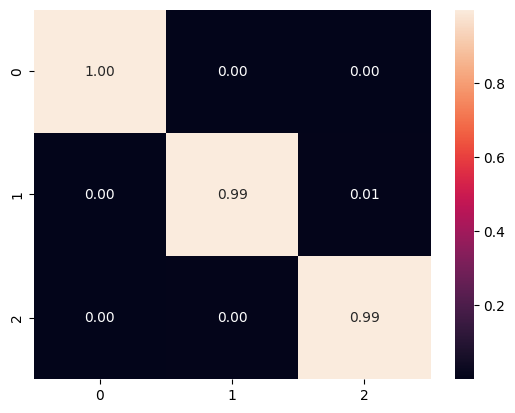

In [ ]:
# Evaluating the model
eval_model("Logistic regression evaluation on train data", y_train_encoded, y_pred_train)

Accuracy Logistic regression evaluation on test data: 0.9
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3771
           1       0.83      0.96      0.89      6571
           2       0.95      0.83      0.89      8369

    accuracy                           0.90     18711
   macro avg       0.91      0.91      0.91     18711
weighted avg       0.91      0.90      0.90     18711

--------------------------------------------------------------------------------


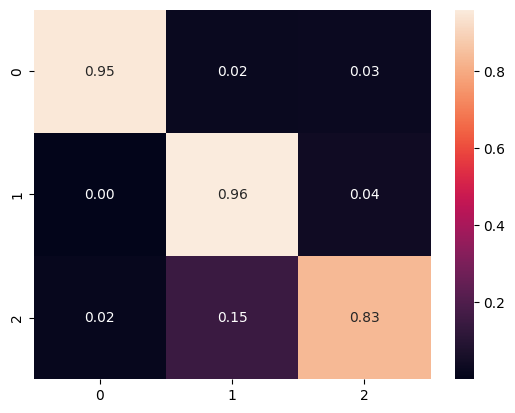

In [ ]:
# Evaluating the model
eval_model("Logistic regression evaluation on test data", y_test_encoded, y_pred_test)

In [122]:
data_train

,ISG15,AGRN,TNFRSF18,TNFRSF4,VWA1,TP73,ESPN,TNFRSF9,ERRFI1,GPR157,...,HUNK,RCAN1,CHAF1B,ERG,MX2,MX1,TFF3,C21orf58,S100B,target
0,57.449242,0.358140,23.495749,46.536316,0.266397,0.018332,0.834641,0.496860,3.559407,0.890697,...,0.164984,3.651470,0.333739,0.152153,5.436435,6.862143,0.053200,0.520029,0.481845,EMS
1,37.279793,0.406706,40.361862,27.014135,0.394508,0.025205,0.163001,0.834325,2.516225,0.803318,...,0.052438,2.482237,0.303148,0.103264,1.639616,3.298496,0.240943,0.298555,0.126374,EMS
2,21.610271,0.285207,76.899200,32.436562,0.119365,0.015591,0.064271,8.797551,1.948475,0.799602,...,0.059951,2.569464,0.218622,0.008295,0.992564,2.132933,0.126832,0.154155,0.188603,EMS
3,27.251394,2.848312,9.090783,10.812315,6.876698,0.104558,0.072048,2.021015,8.070295,2.471217,...,0.276679,5.165727,0.224110,0.451473,1.754076,3.467576,0.327506,0.850884,0.050092,EMS
4,75.894928,0.670752,31.146065,120.764946,0.381830,0.085440,0.237365,13.345847,4.982686,0.881302,...,0.117999,3.788596,0.264301,0.054390,6.715851,10.700207,0.037215,0.664697,0.039378,EMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71953,345.966583,6.774070,9.333247,7.991566,2.850327,2.264667,1.211782,4.635746,1.107362,1.340779,...,0.435622,1.458396,1.289641,0.288339,93.781448,98.746651,0.333445,7.288928,0.117942,Cancer
71954,1427.892944,0.744462,49.723389,12.066818,0.498034,0.018429,0.191264,0.813735,0.088088,0.276485,...,0.010484,0.646375,0.676175,0.010265,169.523560,288.573364,0.114121,0.273846,0.137263,Cancer
71955,990.080444,3.169571,21.095522,2.419520,0.538875,0.781915,0.539590,2.685353,0.233315,0.232293,...,0.017108,1.004058,0.695128,0.006897,141.691055,191.222824,0.128500,1.130097,0.091914,Cancer
71956,200.647095,4.573781,129.978790,31.137032,1.054847,0.095083,0.965027,3.583778,0.221807,1.266359,...,0.059214,1.231297,1.480469,0.008499,30.039696,31.420155,0.114850,0.808806,0.976018,Cancer


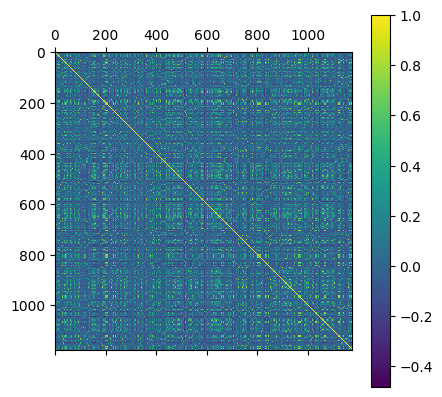

In [ ]:
# Gene-to-gene corrlation? 

import matplotlib.pyplot as plt

plt.matshow(X_train.corr())
plt.colorbar() 
plt.show()

Logistic regression is sensitive to multicolinearity, not suitable as a baseline.